# part5. 데이터 사전처리

In [1]:
# 1. 누락데이터 처리
import seaborn as sns
df = sns.load_dataset('titanic')

In [2]:
df.info() # deck 컬럼의 누락값이 많은 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# deck 컬럼의 전체 개수와 유효한 자료의 개수
df['deck'].value_counts() # 유효한 자료의 개수
df['deck'].value_counts(dropna=False) # 유효한 자료의 개수 -> 누락된 NaN 값 688개 확인

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [10]:
# 누락 데이터가 있는 지 확인: df.isnull() -> True or False로 리턴 / notnull() -> 유효한 자료가 있으면 True
print(df.head().isnull())
print()
print(df.head().notnull())
# df['deck'].isnull()

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  Tru

In [15]:
# isnull() 메소드로 누락 데이터 개수 확인
print(df.isnull().sum(axis=0)) # 행, 컬럼 (0), 열, 인덱스 (1)
# age, deck 컬럼 누락 데이터 확인함

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [16]:
# 누락 데이터 제거: df.dropna(axis=1, thresh=500) # NaN 값이 500개 이상인 값을 제거해라
df_1 = df.dropna(axis=1, thresh=500)
df_1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
# 누락 데이터 치환 : df['컬럼명'].fillna(method=bfill or ffill or value, inplace=True)
# age 컬럼이 NaN 데이터 포함 -> NaN을 age의 평균으로 치환
# print(df['age'].count()) # 714개
# print(df['age'].sum()) # 21205.17

#  age의 평균값을 NaN에 치환
df['age'].fillna(df['age'].mean(axis=0), inplace=True) # mean 평균값 구하기
print(df['age'].head(10))

714
21205.17
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [26]:
df.dropna(axis=1, thresh=500, inplace=True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [35]:
# embark_town 컬럼 확인 -> 인덱스가 825 부터 830까지 확인하려함
print(df['embark_town'][825:831])

# embark_town의 NaN은 가장 많이 나오는 값으로 대체 # Southampton
df['embark_town'].value_counts().max() # 밸류 리턴
df['embark_town'].value_counts().idxmax() # 인덱스 리턴

df_1 = df.copy()

df_1['embark_town'].fillna(df['embark_town'].value_counts().idxmax(), inplace=True)
print(df_1['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object


In [39]:
# embark_town의 NaN 값을 이전에 나오는 값으로 대체
df_2 = df.copy()
print(df_2['embark_town'][825:831])
df_2['embark_town'].fillna(method='ffill', inplace=True) # ffill 앞의 값으로 대체, bfill 뒤의 값으로 대체
print(df_2['embark_town'][825:831])


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object


In [43]:
df['embark_town'].fillna(method='bfill')[825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object

### 2. 중복 데이터 처리

In [ ]:
import pandas as pd

In [49]:
df = pd.DataFrame({'c1':['a','a','b','a','b'], 'c2':[1,1,1,2,2], 'c3':[1,1,2,2,2]})
print(df)
print()

# 전체 데이터 중복값 찾기
df_dup = df.duplicated() # 중복값이 있으면 True 리턴
print(df_dup)
print()

# 특정 컬럼에 대해 중복값 찾기
col_dup = df['c1'].duplicated()
print(col_dup)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2

0    False
1     True
2    False
3    False
4    False
dtype: bool

0    False
1     True
2    False
3     True
4     True
Name: c1, dtype: bool


In [54]:
# 중복행 제거: drop_duplicates()
print(df)
print()

df2 = df.drop_duplicates()
print(df2)

# 중복행 제거: 특정 컬럼 기준으로 
df3 = df.drop_duplicates(subset=['c2', 'c3'], keep='last') # kepp=last -> 마지막에 나오는 중복값으로 유지
print(df3)


  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2
  c1  c2  c3
1  a   1   1
2  b   1   2
4  b   2   2


In [92]:
# 3. 데이터 표준환
# 3-1. 단위 환산: mpg -> kpl로
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [93]:
# 단위를 환산한 'kpl' 컬럼 추가
df['kpl'] = (df['mpg'] * (1.60934 / 3.78541)).round(2) # 소수 두째짜리 까지
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


In [94]:
df_1 = df.iloc[:,1:]
df_1.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


In [95]:
# 3-2. 자료형 변환
# 추가된 'kpl' 컬럼 제거
df.drop('kpl', axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [96]:
# horsepower의 자료 타입 확인 
df['horsepower'].dtypes # 'O' Object -> float 으로 변환
# df['horsepower'] = df['horsepower'].map(float) # ?가 있어서 변환이 안됨
df['horsepower'].unique() # 해당 값의 중복을 제거하고 리스트로 리턴 -> ?가 있음..

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [97]:
import numpy as np

In [98]:
# df['horsepower'] -> '?'가 있음
# 1. '?'를 NaN으로 대체
df['horsepower'].replace({'?':np.NaN}, inplace=True) # '?'를 NaN 으로 대체
print('?' in df['horsepower'].unique()) # '?' 가 없는 것을 확인

# 2. NaN 처리
df.dropna(subset=['horsepower'],axis=0, inplace=True) # NaN 데이터 행(axis=0) 삭제
print(df['horsepower'].isnull().sum()) # 누락 데이터 여부 확인

False
0


In [99]:
# 데이터 타입 변환 방법: map, astype
df['horsepower'] = df['horsepower'].map(float) # 앞에서 처리를 했기 때문에 변환됨
# df['horsepower'] = df['horsepower'].astype('float32') # 앞에서 처리를 했기 때문에 변환됨
print(df['horsepower'].dtype)

float64


In [101]:
df['origin'].unique() # 1: USA, 2: EU, 3: JPN
df['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace=True)
print(df['origin'])

0      USA
1      USA
2      USA
3      USA
4      USA
      ... 
393    USA
394     EU
395    USA
396    USA
397    USA
Name: origin, Length: 392, dtype: object


In [104]:
# 'origin'의 데이터 타입
print(df['origin'].dtype)
df['origin'] = df['origin'].astype('category') # 데이터 타입을 카테고리로 변경 / 막대그래프 등을 그릴 수 있음.
print(df['origin'].dtype)

# 범주형(category)를 문자형(str)로 변경
print(df['origin'].dtype)
df['origin'] = df['origin'].astype('str')
print(df['origin'].dtype)

category
category
category
object


In [108]:
# print(df['model year'])
print(df['model year'].sample(5)) # 샘플 5개 추출

# int 형을 범주형으로 변환
df['model year'] = df['model year'].astype('category')
print(df['model year'].dtype)
print(df['model year'].unique())


387    82
308    79
307    79
284    79
161    75
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]
category
[70, 71, 72, 73, 74, ..., 78, 79, 80, 81, 82]
Length: 13
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


In [128]:
# 4. 범주형 데이터 처리
# auto-mpg.csv 파일을 읽어서, 컬럼명 지정
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

# 1. 누락 데이터 처리: 데이터 개수의 절반 이상이면 해당 컬럼을 삭제 -> 없음
# 2. 데이터 타입 변경
# 2.1 '?' -> NaN으로 대체
df['horsepower'].replace({'?':np.NaN}, inplace=True)

# 2.2 NaN 데이터 행(axis=0) 삭제
df.dropna(subset=['horsepower'],axis=0, inplace=True) 

# 2.3 horsepower 컬럼을 float 형으로 데이터 타입 변환
df['horsepower'] = df['horsepower'].astype('float')

df['horsepower'].info()

<class 'pandas.core.series.Series'>
Int64Index: 392 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [129]:
# horsepower 컬럼을 범주형으로 
# np.histogram() -> 구간의 개수를 입력하면 각 구간별 개수와 경계값 반환
count, bin_values = np.histogram(df['horsepower'],bins=3)
print(count, bin_values)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [136]:
# 구간별 이름: ['저출력', '보통출력','고출력']
bin_names = ['저출력','보통출력','고출력']

# pd.cut() -> 각 데이터를 3개의 bin에 할당
# print(df.head())

df['hp_bin'] = pd.cut(x = df['horsepower'], bins = bin_values, labels = bin_names, include_lowest=True)
print(df[['horsepower','hp_bin']].head(15))

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


In [175]:
# titanic 자료를 읽어 titanic에 저장한 후
titanic = sns.load_dataset('titanic')

# age 컬럼의 NaN은 평균값으로 대체
titanic['age'].fillna(titanic['age'].mean(axis=0), inplace=True) # mean 평균값 구하기
titanic['age'] = titanic['age'].round(0)
titanic.dropna(axis=1, thresh=len(titanic)//2, inplace=True) # thresh 입력할 경우 컬럼명 입력 안함

# age 컬럼을 다음과 같이 구간 분리
# count, bin_values = np.histogram(titanic['age'],bins=5)

bins = [1,15,25,35,60,99]
labels = ['미성년자','청년','중년','장년','노년']

titanic['age_bin'] = pd.cut(x = titanic['age'], bins = bins, labels = labels, include_lowest=True)

# print(count,bin_values)
# print(titanic['age'].head(15))
print()
print(titanic['age_bin'].head(15))


0       청년
1       장년
2       중년
3       중년
4       중년
5       중년
6       장년
7     미성년자
8       중년
9     미성년자
10    미성년자
11      장년
12      청년
13      장년
14    미성년자
Name: age_bin, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']


In [177]:
df['hp_bin'] # 더미 변수로 변환, one-hot-encoding
pd.get_dummies(df['hp_bin'])

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


In [187]:
from sklearn import preprocessing # sklearn의 전처리 모듈을 임포트

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder() # label 오브젝트 생성
onehot_encoder = preprocessing.OneHotEncoder() # onehot 오브젝트 생성

# label encoder로 문자('저출력','보통출력','고출력') 를 숫자형(0,1,2) 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'])
print(onehot_labeled)

# 2차원 배열로 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1)
# print(onehot_reshaped)
# print(type(onehot_reshaped))

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2 2 2 2 2 2 2 2 2 1 2 0 0 0 0 2 2 2 2 2 2 2 2
 1 0 1 1 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1 0 1 1 0 2 1 1 1
 1 1 2 2 2 2 2 2 2 2 0 1 1 1 1 0 1 1 1 0 0 0 2 2 2 2 2 2 1 1 0 0 2 2 2 2 2
 2 2 2 1 0 2 2 2 1 1 1 1 0 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 1 0 1 1 1 2 2 2 2 2 1 1 1
 1 1 2 2 2 0 0 0 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2]
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (1

In [ ]:
# 5. 정규화

In [195]:
# 6. 시계열 데이터
# 문자형 날짜를 daetime 형으로 변경
df = pd.read_csv('./data/stock-data.csv')
print(df.head())
df.info() # Date 의 자료형이 object를 datetime으로 변경 =: pd.to_datetime(자료)

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [196]:
df['new_Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [197]:
# Date 컬럼을 삭제 -> new_Date 컬럼을 인덱스로
df.drop('Date', axis=1, inplace=True)
df.head()


,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2018-07-02
1,10700,10550,10900,9990,170253,2018-06-29
2,10400,10900,10950,10150,155769,2018-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2018-06-26


In [198]:
df.set_index('new_Date', inplace=True)
df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:xlabel='new_Date'>

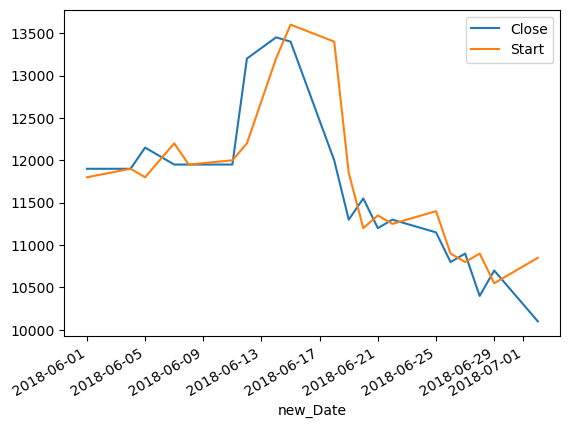

In [202]:
df[['Close','Start']].plot()

In [205]:
# Timestamp를 period로 변환
dates = ['2019-01-01','2020-03-01','2021-06-01']

to_dates = pd.to_datetime(dates)
print(to_dates)

# timestamp를 period로 변환
pr_day = to_dates.to_period(freq='D')
print(pr_day)

pr_month = to_dates.to_period(freq='M')
print(pr_month)

pr_year = to_dates.to_period(freq='Y')
print(pr_year)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')


In [208]:
# 날짜를 분리 -> 년, 월, 일로
df = pd.read_csv('./data/stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28


In [210]:
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df.head(3)

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28


In [204]:
# 시도별 전출입 인구수 자료에 대한 전처리
import pandas as pd
import numpy as np

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx')
# df.info()
# print(df.isnull().sum()) # 전출지의 빈 값이 많음
df['전출지별'].fillna(method='ffill',inplace=True) # 전출지 비어 있는 NaN 값을 ffill을 이용해서 채움
df.drop(0, axis=0, inplace=True) # 첫번째 행 삭제
df.replace('-','0', inplace=True) # '-'를 0 으로 대체
df[df.columns[2:]] = df[df.columns[2:]].astype(int) # 연도수 컬럼을 int형으로 변환
df.rename(columns={'전출지별':'전출지', '전입지별':'전입지'},inplace=True) # 각 컬럼명 변경
df = df[df['전출지'] != df['전입지']] # 전출지와 전출지가 다른 것만 다시 데이터 프레임으로
# df

# 서울특별시에서 다른 곳으로 이전한 경우만 새로 설정
df_seoul = df[(df['전출지']=='서울특별시') & (df['전입지']!='서울특별시')]
df_seoul.drop('전출지', axis=1, inplace=True) # 전출지 컬럼 삭제
df_seoul.set_index('전입지', inplace=True) # 전입지 인덱스 설정
df_seoul.drop('전국', axis=0, inplace=True) # 전국 행 삭제

df_seoul = df_seoul.T
df_seoul.mean()

C:\Users\Jasper\AppData\Local\Temp\ipykernel_99196\3148971063.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop('전출지', axis=1, inplace=True) # 전출지 컬럼 삭제
C:\Users\Jasper\AppData\Local\Temp\ipykernel_99196\3148971063.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop('전국', axis=0, inplace=True) # 전국 행 삭제


전입지
부산광역시       20204.062500
대구광역시        8756.833333
인천광역시       43470.270833
광주광역시        7968.395833
대전광역시        9485.166667
울산광역시        2099.854167
세종특별자치시       659.083333
경기도        367334.729167
강원도         23880.729167
충청북도        17077.645833
충청남도        31859.854167
전라북도        24333.520833
전라남도        28784.520833
경상북도        21920.312500
경상남도        18887.187500
제주특별자치도      5432.937500
dtype: float64